<h1 style="font-weight:bold;"><i style="color:blue;">DATA MINING</i></h1>

<h5 style="font-weight:bold;"><i style="color:blue;">By:</i></h5>
<i style="color: black; font-weight:bold;"><br/> - Safae NABET<br/> - Hanae ELKORRI</i><br/><br/>

<h2 style="font-weight:bold;"><i style="color:darkgreen;">Data Preprocessing:</i></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<h5 style="font-weight:bold;"><i style="color:teal;"> Verfifying if there are any missing values:</i></h5>

In [7]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<h5 style="font-weight:bold;"><i style="color:teal;"> Dropping rows with missing values except for the variables "agent" and "company":</i></h5>

In [9]:
df = df.dropna(subset=['children'])
df = df.dropna(subset=['country'])

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

<h5 style="font-weight:bold;"><i style="color:teal;">Changing arrival year, month and day feature to datetime format called arrival_date:</i></h5>

In [11]:
df1 = df
df1['arrival_date_year']=df1['arrival_date_year'].astype(str)
df1['arrival_date_month']=df1['arrival_date_month'].astype(str)
df1['arrival_date_day_of_month']=df1['arrival_date_day_of_month'].astype(str)

In [12]:
df1["arrival_date"] = pd.to_datetime(df1["arrival_date_month"]+df1["arrival_date_year"]+df1["arrival_date_day_of_month"], format='%B%Y%d')

In [13]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [14]:
print(df1["arrival_date"].dtypes)

datetime64[ns]


<h5 style="font-weight:bold;"><i style="color:teal;">Verifying that the timestamp of the variable reservation_status_date must occur after or at the same date as the input variable arrival_date: </i></h5>

In [15]:
df1["reservation_status_date"] = pd.to_datetime(df1["reservation_status_date"])
l = np.less(df1["reservation_status_date"], df1["arrival_date"])
l.sum()

42087

<h5 style="font-weight:bold;"><i style="color:teal;">The proposed preprocessing: </i></h5>

In [16]:
print(df["reserved_room_type"].unique())
print(df["assigned_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K' 'P']


In [17]:
def changed_room(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return 0
    else:
        return 1

df['changed_room'] = df.apply(changed_room, axis=1)
df = df.drop(["assigned_room_type", "reserved_room_type"], axis=1)

In [18]:
df.notna().sum()

hotel                             118898
is_canceled                       118898
lead_time                         118898
arrival_date_year                 118898
arrival_date_month                118898
arrival_date_week_number          118898
arrival_date_day_of_month         118898
stays_in_weekend_nights           118898
stays_in_week_nights              118898
adults                            118898
children                          118898
babies                            118898
meal                              118898
country                           118898
market_segment                    118898
distribution_channel              118898
is_repeated_guest                 118898
previous_cancellations            118898
previous_bookings_not_canceled    118898
booking_changes                   118898
deposit_type                      118898
agent                             102894
company                             6623
days_in_waiting_list              118898
customer_type   

In [19]:
df["country"].astype(str)
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [20]:
print(df.groupby(["country"]).size().sort_values())

country
BHS        1
NIC        1
DMA        1
NCL        1
NAM        1
       ...  
DEU     7287
ESP     8568
FRA    10415
GBR    12129
PRT    48586
Length: 177, dtype: int64


In [21]:
c = df.columns.get_loc("country")
print(c)

13


In [22]:
for i in range(len(df)):
    if df.iloc[i,c] == 'PRT':
        df.iloc[i,c] = 1
    elif df.iloc[i,c] == 'GBR':
        df.iloc[i,c] = 2
    elif df.iloc[i,c] == 'FRA':
        df.iloc[i,c] = 3
    else:
        df.iloc[i,c] = 0

In [23]:
df["country"].unique()

array([1, 2, 0, 3], dtype=object)

In [24]:
df['agent'].fillna(df['agent'].mode()[0], inplace=True)

In [25]:
df["hotel"] = df["hotel"].astype(str)

In [26]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
df["hotel"] = encoder.fit_transform(df["hotel"])

In [27]:
categorical_variables = ['customer_type', 'deposit_type', 'market_segment', 'distribution_channel', 'country', 'reservation_status']
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [28]:
df = df.drop(["reservation_status_date", "meal", "company"], axis=1)

In [29]:
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.arrival_date_month = df.arrival_date_month.map(months)

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_1,country_2,country_3,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,7,27,1,0,0,2,...,0,1,0,0,0,1,0,0,1,0
1,1,0,737,2015,7,27,1,0,0,2,...,0,1,0,0,0,1,0,0,1,0
2,1,0,7,2015,7,27,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
4,1,0,14,2015,7,27,1,0,2,2,...,1,0,0,1,0,0,1,0,1,0


In [31]:
df.to_csv('hotel_data.csv')

<h2 style="font-weight:bold;"><i style="color:darkgreen;">Exploratory Data Analysis:</i></h2>

<h5 style="font-weight:bold;"><i style="color:teal;">Creating dataset summary statistics for date variables:</i></h5>

In [32]:
df_Dates = pd.DataFrame(df1, columns=["reservation_status_date", "arrival_date"])
df_Dates.describe(include='all')

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,reservation_status_date,arrival_date
count,118898,118898
unique,926,793
top,2015-10-21 00:00:00,2015-12-05 00:00:00
freq,1461,448
first,2014-10-17 00:00:00,2015-07-01 00:00:00
last,2017-09-14 00:00:00,2017-08-31 00:00:00


<h5 style="font-weight:bold;"><i style="color:teal;"> Creating dataset summary statistics for categorical variables:</i></h5>

In [33]:
df1["is_canceled"]= df1["is_canceled"].astype(str)
df1["is_repeated_guest"]= df1["is_repeated_guest"].astype(str)
df1.describe(include=[np.object])

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,2,3,12,31,5,177,7,5,2,10,12,3,4,3
top,City Hotel,0,2016,August,17,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
freq,79302,74745,56435,13852,4390,91863,48586,56402,97730,115092,85601,73863,104163,89174,74745


<h5 style="font-weight:bold;"><i style="color:teal;"> Creating dataset summary statistics for integer and numeric variables:</i></h5>

In [34]:
df1.describe(include=[np.number,'integer'])

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,changed_room
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,102894.000000,6623.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,27.166555,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,86.545532,189.624792,2.330754,102.003243,0.061885,0.571683,0.123627
std,106.903309,13.589971,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,110.714259,132.124298,17.630452,50.485862,0.244172,0.792678,0.329157
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,0.000000
max,737.000000,53.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,1.000000


<h5 style="font-weight:bold;"><i style="color:teal;"> Checking the distribution of hotel type for cancellation:</i></h5>

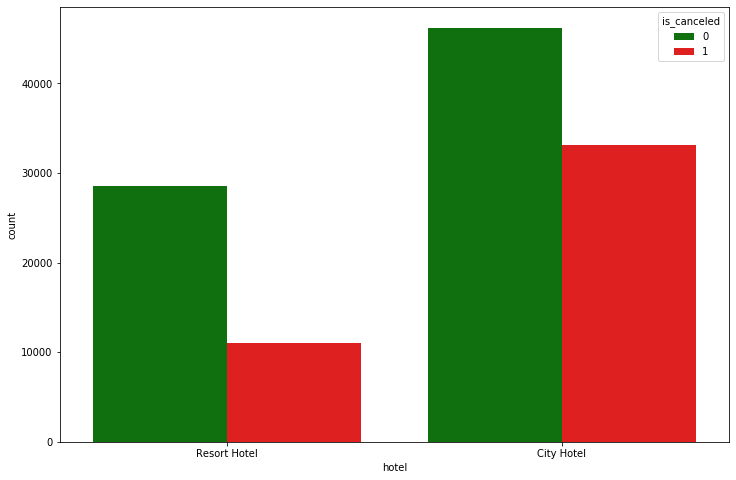

In [35]:
fig = plt.gcf()
#Change seaborn plot size
fig.set_size_inches(12,8)
sns.countplot(data=df1, x='hotel', hue='is_canceled', palette=['g','r'])

<h5 style="font-weight:bold;"><i style="color:teal;"> Plot of cancellation distribution and Number of Adults:</i></h5>

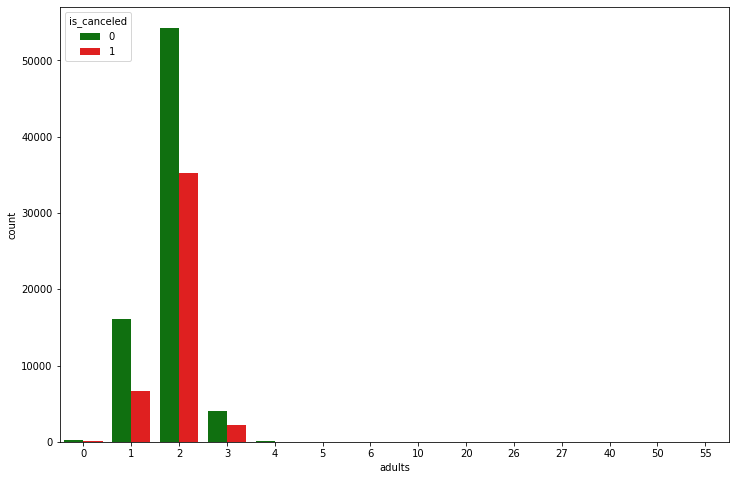

In [36]:
fig = plt.gcf()
#Change seaborn plot size
fig.set_size_inches(12,8)
sns.countplot(data=df1, x='adults', hue='is_canceled', palette=['g','r'])